In [2]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays

# Load and display LiDAR raster

The LiDAR raster files are located in the `data` folder. The rasters are in single band `TIFF` image format.

In [10]:
data_dir = Path('data')
tif_files = list(data_dir.glob('*.tif'))
tif_files


[PosixPath('data/dsm_vox_50cm_tile_-11_0.tif'),
 PosixPath('data/dsm_vox_50cm_tile_-7_1.tif'),
 PosixPath('data/dsm_vox_50cm_tile_-12_0.tif')]

## 1. Load and display a raster file

- Open the raster file and read the 2D array (tip: you can type `?function` to display docstrings, e.g. `?rio.open` )
- Read the 2D array
- Display the 2D array as an image
    + what can we do to visualize more details?

In [ ]:
# Your turn!
with rio.open(tif_files[0]) as src:
    print(src.profile)
    band1 = src.read(1)
    nodata = src.nodata  ## get NoData value 

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 2001, 'height': 2001, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32630"]]'), 'transform': Affine(0.5, 0.0, 598220.0,
       0.0, -0.5, 5329810.5), 'blockxsize': 2001, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [16]:
## alternative way to load the raster
# raster_path = sorted(data_dir.glob("*.tif"))[0]
# with rio.open(raster_path) as src:
#     band = src.read(1)   # first band (2D array)
#     print(src.profile)


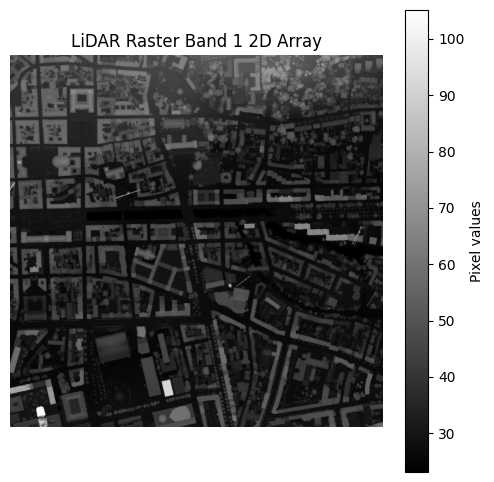

In [18]:
# plotting them
plt.figure(figsize=(6, 6))
plt.imshow(band1, cmap="gray")
plt.colorbar(label="Pixel values")
plt.title('LiDAR Raster Band 1 2D Array')
plt.axis("off")
plt.show()


## what can we do to visualize more details?

### We can use pan-sharpening filters like lablacian filter so the edges and boundaries will be more details or Histogram Equalization to enhance low contarst areas or percentile streching to reveal small structures

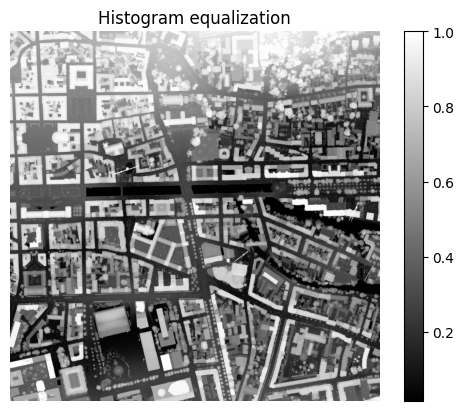

In [19]:
from skimage import exposure

band_eq = exposure.equalize_hist(band1)

plt.imshow(band_eq, cmap="gray")
plt.colorbar()
plt.title("Histogram equalization")
plt.axis("off")
plt.show()


## 2. Visualize flat zones in the DSM

- Find the values of the flat zones
    + Sort the unique values in a list (or an array) of levels
- Display some flat zones
    + Display the flatzones of $i^{th}$ level

In [21]:
# Your turn!
band1.shape


(2001, 2001)

In [ ]:
# Mask NoData
dsm = band1.astype(float) # convert to float for NaN support
if nodata is not None:  # mask NoData values
    dsm[dsm == nodata] = np.nan # set NoData to NaN so they are ignored in computations

In [38]:
#3 sorting unique values
values = np.unique(dsm[~np.isnan(dsm)])
values = np.sort(values)

print(f"Number of unique values (excluding NoData): {len(values)}")
print(f"Min value: {values[0]}, Max value: {values[-1]}")

Number of unique values (excluding NoData): 776995
Min value: 23.139999389648438, Max value: 105.11000061035156


In [41]:
type(values)

numpy.ndarray

In [40]:
type(dsm)


numpy.ndarray

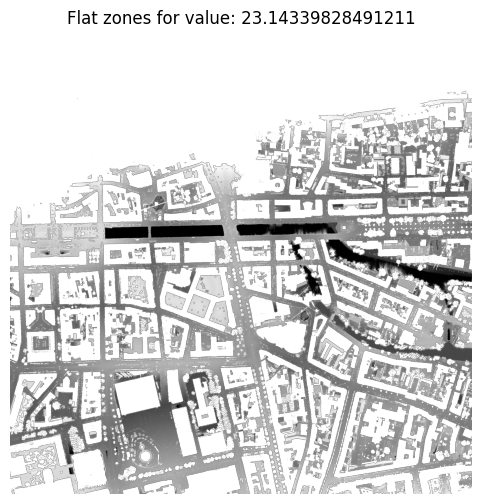

In [42]:
## display flat zones

dsm_thr = dsm.copy()
dsm_thr[dsm_thr > 30] = np.nan

# i = 30
# y = values[i]
# mask = dsm == y
plt.figure(figsize=(6, 6))
plt.imshow(dsm_thr, cmap="gray")
plt.title(f"Flat zones for value: {y}")
plt.axis("off")
plt.show()

## 3. Create a max-tree of the DSM

Building a max-tree from scratch is a challenging assignement 🙂

In [36]:
# If you have time, you can start work on a max-tree algorithm 

from sap import MaxTree
mt = MaxTree(dsm)
mt.build(dsm)
mt.plot_tree()


AttributeError: 'MaxTree' object has no attribute 'build'